# Monte Carlo Simulation

## Import packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Estimate pi

A Monte Carlo simulation can be used as a method for estimating the value of pi. Randomly sample numbers in the unit square between [-0.5, -0.5] and [0.5, 0.5], and calculate the distance from each point to the origin. If a point is within 0.5 of distance from the origin, then it falls within a circle centred on the origin of radius diameter equal to 1. The proportion of the points falling in the circle relates to the area of the circle and square according to the following equation:

$\frac{\text{Number of points in circle}}{\text{Total number of points}} = \frac{\text{Area of circle}}{\text{Area of square}}$

Using the equation for the area of a circle ($\text{Area} = \pi r^2$), we can rearrange this equation to give a formula for estimating pi:

$\pi = \frac{\text{Number of points in circle}}{\text{Total number of points} \times r^2}$

Where $r$ is the radius of the circle, i.e. 0.5.

In [ ]:
def estimate_pi(n, seed=42):
    '''Calculate the value of pi using Monte Carlo simulation of n samples.'''
    
    # Specify the random seed.
    np.random.seed = seed
    
    # Randomly sample points within the unit square surrounding the origin, giving coordinates x and y.
    random_nums = np.random.rand(n, 2) - 0.5
    
    # Find the square root of the sums of the squares for each point to give the distance from the origin.
    squares = np.multiply(random_nums, random_nums)
    sums_of_squares = np.sum(squares, axis=1)
    distances = np.sqrt(sums_of_squares)

    # The values between 0 and 0.5 and within the circle, so we can just apply a rounding function to identify these.
    within_circle = n - np.sum(np.round(distances, decimals=0))
    
    # Estimate pi using the formula given above.
    pi_estimate = np.sum(within_circle) / n / 0.25

    return pi_estimate

### Testing

Estimate pi for various values of n, i.e. the number of sampling points.

In [15]:
# Number of different values of n to try.
m = 20

n_array = [int(10**(x/4)) for x in range(m)]

pi_estimates = []

for n in n_array:
    pi_estimates.append(estimate_pi(n, seed=42))

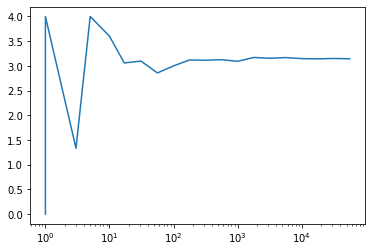

In [16]:
plt.plot(n_array, pi_estimates)
plt.semilogx()
plt.xlabel('Number of sample points')
plt.ylabel('')
plt.show()